In [ ]:
pip install streamlit -q

In [ ]:
!pip install sequential
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')   

In [ ]:
from keras.backend import transpose
#Get stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-12-06')
#show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519278
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586558
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726295
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859331
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838936
...,...,...,...,...,...,...
2022-11-30,148.720001,140.550003,141.399994,148.029999,111224400.0,148.029999
2022-12-01,149.130005,146.610001,148.210007,148.309998,71250400.0,148.309998
2022-12-02,148.000000,145.649994,145.960007,147.809998,65421400.0,147.809998


In [ ]:
#get the number of rows and columns in data set
df.shape

(2741, 6)

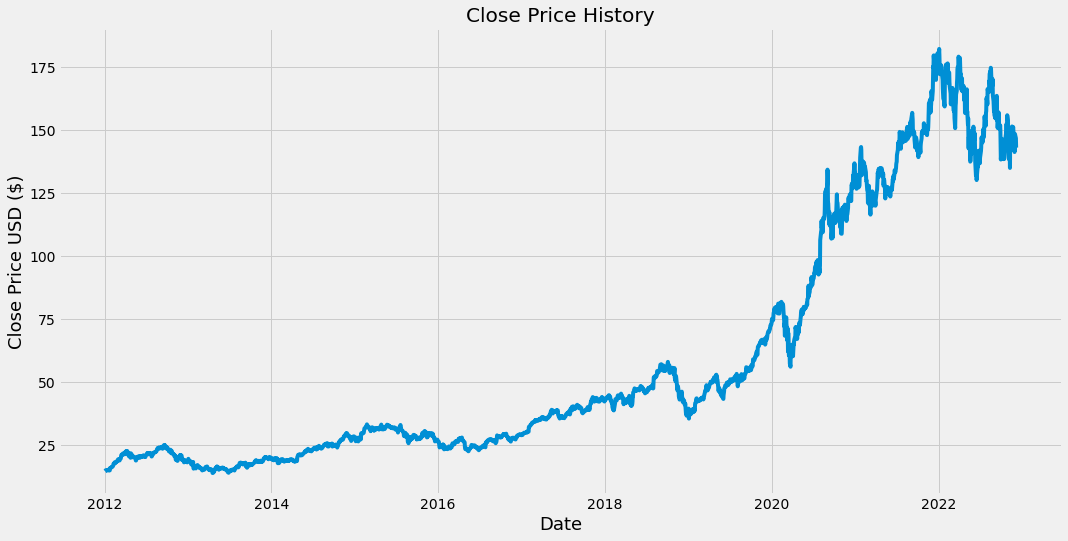

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.show()

In [ ]:
#create a new dat
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

2201

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.79650429],
       [0.78948313],
       [0.7673485 ]])

In [ ]:
from os import X_OK
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
 #Convert x_train and Y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2141, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/21
2141/2141 [==============================] - 34s 16ms/step - loss: 1.9249e-04
Epoch 2/21
2141/2141 [==============================] - 35s 16ms/step - loss: 1.2808e-04
Epoch 3/21
2141/2141 [==============================] - 34s 16ms/step - loss: 1.4028e-04
Epoch 4/21
2141/2141 [==============================] - 33s 16ms/step - loss: 1.1319e-04
Epoch 5/21
2141/2141 [==============================] - 33s 15ms/step - loss: 1.3211e-04
Epoch 6/21
2141/2141 [==============================] - 33s 16ms/step - loss: 1.0342e-04
Epoch 7/21
2141/2141 [==============================] - 35s 16ms/step - loss: 9.3708e-05
Epoch 8/21
2141/2141 [==============================] - 34s 16ms/step - loss: 8.7643e-05
Epoch 9/21
2141/2141 [==============================] - 35s 16ms/step - loss: 1.1169e-04
Epoch 10/21
2141/2141 [==============================] - 34s 16ms/step - loss: 1.0143e-04
Epoch 11/21
2141/2141 [==============================] - 34s 16ms/step - loss: 7.9715e-05
Epoch 12/21
2141/21

In [ ]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data in numpy array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 9ms/step


In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.8586822093616835

<ipython-input-21-6a1f47c5562e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


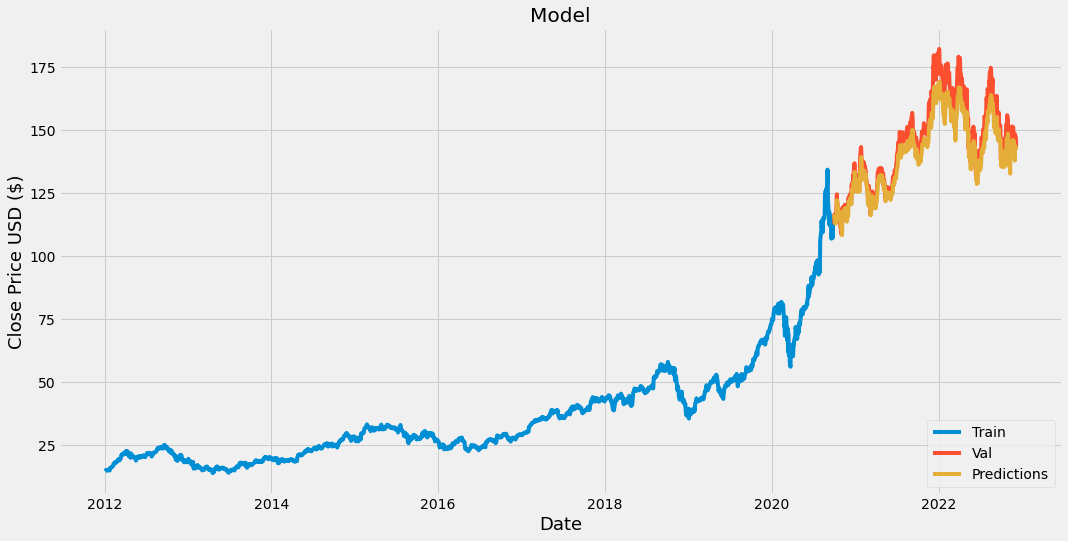

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2020-10-01,116.790001,114.737511
2020-10-02,113.019997,115.785522
2020-10-05,116.500000,112.857895
2020-10-06,113.160004,115.129013
2020-10-07,115.080002,112.958618
...,...,...
2022-11-30,148.029999,137.775803
2022-12-01,148.309998,142.538620
2022-12-02,147.809998,143.566788


In [ ]:
apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01', end = '2022-12-06')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1)) 
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 18ms/step
[[139.28307]]


In [ ]:
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2022-12-06', end = '2022-12-07')
print(apple_quote2['Close'])

Date
2022-12-06    142.910004
2022-12-07    140.860992
Name: Close, dtype: float64
